In [1]:
from modelarts.session import Session
sess = Session()
sess.download_data(bucket_path="obs-c92f/第二期猫狗识别h5文件/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5",path='./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')
sess.download_data(bucket_path="obs-c92f/第二期猫狗识别h5文件/xception_weights_tf_dim_ordering_tf_kernels_notop.h5",path='./xception_weights_tf_dim_ordering_tf_kernels_notop.h5')
sess.download_data(bucket_path="obs-c92f/第二期猫狗识别h5文件/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",path='./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
sess.download_data(bucket_path="obs-c92f/第二期猫狗识别h5文件/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5",path='./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

Successfully download file obs-c92f/第二期猫狗识别h5文件/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5 from OBS to local ./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5
Successfully download file obs-c92f/第二期猫狗识别h5文件/xception_weights_tf_dim_ordering_tf_kernels_notop.h5 from OBS to local ./xception_weights_tf_dim_ordering_tf_kernels_notop.h5
Successfully download file obs-c92f/第二期猫狗识别h5文件/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 from OBS to local ./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
Successfully download file obs-c92f/第二期猫狗识别h5文件/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 from OBS to local ./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [2]:
!pip install --upgrade keras.applications==1.0.6 keras==2.2.4

    100% |████████████████████████████████| 51kB 78.8MB/s ta 0:00:01
    100% |████████████████████████████████| 317kB 101.7MB/s ta 0:00:01
    100% |████████████████████████████████| 20.0MB 98.3MB/s eta 0:00:011.8MB 98.1MB/s eta 0:00:01   34% |███████████                     | 6.8MB 90.5MB/s eta 0:00:01ta 0:00:01MB/s eta 0:00:01
    100% |████████████████████████████████| 2.9MB 102.3MB/s a 0:00:011�█████████▍          | 1.9MB 106.7MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 77.2MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 83.3MB/s ta 0:00:01
    100% |████████████████████████████████| 25.2MB 103.5MB/s ta 0:00:01                 | 7.7MB 71.6MB/s eta 0:00:01 eta 0:00:01MB/s eta 0:00:01��██████████████▏        | 18.2MB 87.4MB/s eta 0:00:01��█████████████████████████▊   | 22.6MB 97.3MB/s eta 0:00:01
    100% |████████████████████████████████| 266kB 98.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /home

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
if os.path.exists('./data') == False:
    from modelarts.session import Session
    session = Session()
    
    if session.region_name == 'cn-north-1':
        bucket_path="modelarts-labs/end2end/image_recognition/dog_and_cat_25000.tar.gz"
    elif session.region_name == 'cn-north-4':
        bucket_path="modelarts-labs-bj4/end2end/image_recognition/dog_and_cat_25000.tar.gz"
    else:
        print("请更换地区到北京一或北京四")
        
    session.download_data(
        bucket_path=bucket_path,
        path="./dog_and_cat_25000.tar.gz")

    # 使用tar命令解压资源包
    !tar xf ./dog_and_cat_25000.tar.gz

    # 清理压缩包
    !rm -f ./dog_and_cat_25000.tar.gz

Successfully download file modelarts-labs/end2end/image_recognition/dog_and_cat_25000.tar.gz from OBS to local ./dog_and_cat_25000.tar.gz


In [4]:
import keras.utils
data_path = './data/'
image_names = [os.path.join(data_path,i) for i in os.listdir(data_path)]

import random
import matplotlib.pyplot as plt
random.shuffle(image_names)

import cv2
import numpy as np
rows = 128
cols = 128
channels = 3
def read_image(file_path):
    img = cv2.imread(file_path,cv2.IMREAD_COLOR)
    return cv2.resize(img,(rows,cols),interpolation=cv2.INTER_CUBIC)

def pre_data(images_file):
    data = np.empty((len(image_names),rows,cols,channels),dtype='uint8')
    for i,image_file in enumerate(images_file):
        image = read_image(image_file)
        data[i] = image
        if i%2000==0:
            print('已经读取:{}%'.format(i/25000))
    return data

images_data = pre_data(image_names)
print(images_data.shape)

Using TensorFlow backend.


已经读取:0.0%
已经读取:0.08%
已经读取:0.16%
已经读取:0.24%
已经读取:0.32%
已经读取:0.4%
已经读取:0.48%
已经读取:0.56%
已经读取:0.64%
已经读取:0.72%
已经读取:0.8%
已经读取:0.88%
已经读取:0.96%
(25000, 128, 128, 3)


In [5]:
num_train_samples = len(images_data)
num_classes = 2
labels = []
index = 0
for file in image_names:
    if 'dog' in file:
        labels.append(1)
    elif 'cat' in file:
        labels.append(0)
        
from keras.utils import np_utils
labels = np_utils.to_categorical(labels,num_classes)

from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(images_data,labels,
                                                                test_size=0.3,
                                                                random_state=2)

In [6]:
from keras.optimizers import RMSprop,adam
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.models import Model
from keras.callbacks import Callback,EarlyStopping,LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
import cv2
import numpy as np
from keras.layers import Input, Dense
from keras.utils import np_utils
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras import backend as K
from keras.applications.xception import Xception
from keras import regularizers
import time


learning_rate = 1e-4
batch_size = 32
max_epochs = 10
objective = 'binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Train on 13125 samples, validate on 4375 samples
Epoch 1/10
13125/13125 [==============================] - 79s 6ms/step - loss: 15.1922 - acc: 0.8835 - val_loss: 3.1171 - val_acc: 0.9454
Epoch 2/10
13125/13125 [==============================] - 55s 4ms/step - loss: 1.0763 - acc: 0.9669 - val_loss: 0.3366 - val_acc: 0.9518
Epoch 3/10
13125/13125 [==============================] - 54s 4ms/step - loss: 0.2322 - acc: 0.9890 - val_loss: 0.2560 - val_acc: 0.9534
Epoch 4/10
13125/13125 [==============================] - 54s 4ms/step - loss: 0.1960 - acc: 0.9917 - val_loss: 0.2566 - val_acc: 0.9568
Epoch 5/10
13125/13125 [==============================] - 55s 4ms/step - loss: 0.1765 - acc: 0.9962 - val_loss: 0.2487 - val_acc: 0.9563
Epoch 6/10
13125/13125 [==============================] - 54s 4ms/step - loss: 0.1712 - acc: 0.9962 - val_loss: 0.2534 - val_acc: 0.9522
Epoch 7/10
13125/13125 [==============================] - 54s 4ms/step - loss: 0.1696 - acc: 0.9935 - val_loss: 0.2459 - val_acc

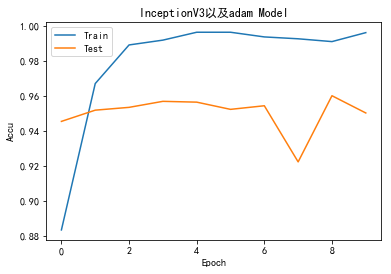

InceptionV3以及adam在imagenet下，消耗时间 598.7343316078186


In [7]:
start = time.time()
optimizer = adam(lr=learning_rate)
def load_model():
    base_model = InceptionV3(weights=None, include_top=False,input_shape=(rows, cols, channels), pooling='avg')
    base_model.load_weights('./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
    prediction_layer = Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(10))(base_model.output)
    model = Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = load_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')



def run_train():
    h = model.fit(
        train_data,
        train_labels,
        batch_size=batch_size,
        epochs=max_epochs,
        validation_split=0.25,
        verbose=1,
        shuffle=True,
        callbacks=[early_stopping])
    return h


history_xception_adam = run_train()
plt.plot(history_xception_adam.history['acc'])
plt.plot(history_xception_adam.history['val_acc'])
plt.title('InceptionV3以及adam Model')
plt.xlabel('Epoch')
plt.ylabel('Accu')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
end = time.time()
print('InceptionV3以及adam在imagenet下，消耗时间',str(end - start))

Train on 13125 samples, validate on 4375 samples
Epoch 1/10
13125/13125 [==============================] - 82s 6ms/step - loss: 15.3278 - acc: 0.9220 - val_loss: 3.1360 - val_acc: 0.9605
Epoch 2/10
13125/13125 [==============================] - 65s 5ms/step - loss: 1.1183 - acc: 0.9805 - val_loss: 0.3500 - val_acc: 0.9694
Epoch 3/10
13125/13125 [==============================] - 65s 5ms/step - loss: 0.2926 - acc: 0.9921 - val_loss: 0.2883 - val_acc: 0.9641
Epoch 4/10
13125/13125 [==============================] - 66s 5ms/step - loss: 0.2489 - acc: 0.9970 - val_loss: 0.2826 - val_acc: 0.9666
Epoch 5/10
13125/13125 [==============================] - 65s 5ms/step - loss: 0.2337 - acc: 0.9954 - val_loss: 0.2758 - val_acc: 0.9618
Epoch 6/10
13125/13125 [==============================] - 65s 5ms/step - loss: 0.2199 - acc: 0.9956 - val_loss: 0.2617 - val_acc: 0.9705
Epoch 7/10
13125/13125 [==============================] - 65s 5ms/step - loss: 0.2100 - acc: 0.9952 - val_loss: 0.2494 - val_acc

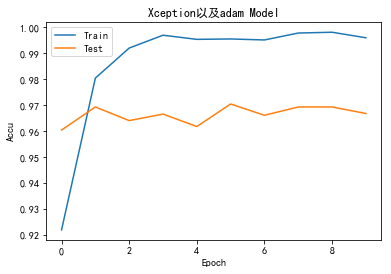

Xception以及adam在imagenet下，消耗时间 684.9041178226471


In [8]:
start = time.time()
optimizer = adam(lr=learning_rate)
def load_model():
    base_model = Xception(weights=None, include_top=False,input_shape=(rows, cols, channels), pooling='avg')
    base_model.load_weights('./xception_weights_tf_dim_ordering_tf_kernels_notop.h5')
    prediction_layer = Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(10))(base_model.output)
    model = Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = load_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')



def run_train():
    h = model.fit(
        train_data,
        train_labels,
        batch_size=batch_size,
        epochs=max_epochs,
        validation_split=0.25,
        verbose=1,
        shuffle=True,
        callbacks=[early_stopping])
    return h


history_xception_adam = run_train()
plt.plot(history_xception_adam.history['acc'])
plt.plot(history_xception_adam.history['val_acc'])
plt.title('Xception以及adam Model')
plt.xlabel('Epoch')
plt.ylabel('Accu')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
end = time.time()
print('Xception以及adam在imagenet下，消耗时间',str(end - start))

Train on 13125 samples, validate on 4375 samples
Epoch 1/10
13125/13125 [==============================] - 55s 4ms/step - loss: 32.0668 - acc: 0.5036 - val_loss: 20.4152 - val_acc: 0.4946
Epoch 2/10
13125/13125 [==============================] - 46s 3ms/step - loss: 14.7466 - acc: 0.5036 - val_loss: 11.1535 - val_acc: 0.4946
Epoch 3/10
13125/13125 [==============================] - 46s 4ms/step - loss: 9.4793 - acc: 0.5036 - val_loss: 8.6700 - val_acc: 0.4946
Epoch 4/10
13125/13125 [==============================] - 46s 3ms/step - loss: 6.9499 - acc: 0.5034 - val_loss: 0.7657 - val_acc: 0.4946
Epoch 5/10
13125/13125 [==============================] - 46s 3ms/step - loss: 0.7202 - acc: 0.5083 - val_loss: 0.6984 - val_acc: 0.4946
Epoch 6/10
13125/13125 [==============================] - 46s 3ms/step - loss: 0.6964 - acc: 0.5093 - val_loss: 0.6931 - val_acc: 0.4946
Epoch 7/10
13125/13125 [==============================] - 46s 3ms/step - loss: 0.6771 - acc: 0.5593 - val_loss: 0.6553 - val_

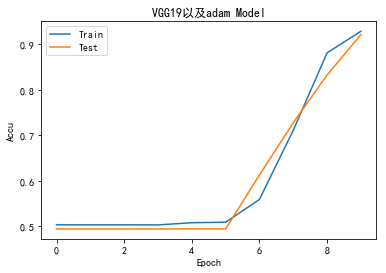

VGG19以及adam在imagenet下，消耗时间 475.7239134311676


In [9]:
start = time.time()
optimizer = adam(lr=learning_rate)
def load_model():
    base_model = VGG19(weights=None, include_top=False,input_shape=(rows, cols, channels), pooling='avg')
    base_model.load_weights('./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')
    prediction_layer = Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(10))(base_model.output)
    model = Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = load_model()

early_stopping = EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')



def run_train():
    h = model.fit(
        train_data,
        train_labels,
        batch_size=batch_size,
        epochs=max_epochs,
        validation_split=0.25,
        verbose=1,
        shuffle=True,
        callbacks=[early_stopping])
    return h


history_xception_adam = run_train()
plt.plot(history_xception_adam.history['acc'])
plt.plot(history_xception_adam.history['val_acc'])
plt.title('VGG19以及adam Model')
plt.xlabel('Epoch')
plt.ylabel('Accu')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
end = time.time()
print('VGG19以及adam在imagenet下，消耗时间',str(end - start))

Train on 13125 samples, validate on 4375 samples
Epoch 1/10
13125/13125 [==============================] - 55s 4ms/step - loss: 22.6411 - acc: 0.5038 - val_loss: 11.7448 - val_acc: 0.5550
Epoch 2/10
13125/13125 [==============================] - 47s 4ms/step - loss: 6.7557 - acc: 0.5064 - val_loss: 3.4031 - val_acc: 0.4946
Epoch 3/10
13125/13125 [==============================] - 47s 4ms/step - loss: 2.0430 - acc: 0.5055 - val_loss: 1.1974 - val_acc: 0.4946
Epoch 4/10
13125/13125 [==============================] - 47s 4ms/step - loss: 0.9152 - acc: 0.5151 - val_loss: 0.7579 - val_acc: 0.4946
Epoch 5/10
13125/13125 [==============================] - 47s 4ms/step - loss: 0.7178 - acc: 0.5036 - val_loss: 0.6984 - val_acc: 0.4946
Epoch 6/10
13125/13125 [==============================] - 47s 4ms/step - loss: 0.6948 - acc: 0.5036 - val_loss: 0.6934 - val_acc: 0.4946
Epoch 7/10
13125/13125 [==============================] - 47s 4ms/step - loss: 0.6935 - acc: 0.5057 - val_loss: 0.6933 - val_ac

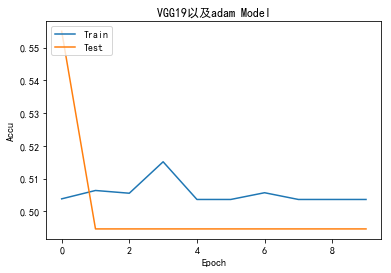

VGG19以及adam在无参情况下，消耗时间 476.5456154346466


In [10]:
start = time.time()
optimizer = adam(lr=learning_rate)
def load_model():
    base_model = VGG19(weights=None, include_top=False,input_shape=(rows, cols, channels), pooling='avg')
    #base_model.load_weights('./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')
    prediction_layer = Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(10))(base_model.output)
    model = Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = load_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')



def run_train():
    h = model.fit(
        train_data,
        train_labels,
        batch_size=batch_size,
        epochs=max_epochs,
        validation_split=0.25,
        verbose=1,
        shuffle=True,
        callbacks=[early_stopping])
    return h


history_xception_adam = run_train()
plt.plot(history_xception_adam.history['acc'])
plt.plot(history_xception_adam.history['val_acc'])
plt.title('VGG19以及adam Model')
plt.xlabel('Epoch')
plt.ylabel('Accu')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
end = time.time()
print('VGG19以及adam在无参情况下，消耗时间',str(end - start))

In [ ]:
start = time.time()
optimizer = adam(lr=learning_rate)
def load_model():
    base_model = VGG16(weights=None, include_top=False,input_shape=(rows, cols, channels), pooling='avg')
    base_model.load_weights('./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
    prediction_layer = Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(10))(base_model.output)
    model = Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = load_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')



def run_train():
    h = model.fit(
        train_data,
        train_labels,
        batch_size=batch_size,
        epochs=max_epochs,
        validation_split=0.25,
        verbose=1,
        shuffle=True,
        callbacks=[early_stopping])
    return h


history_xception_adam = run_train()
plt.plot(history_xception_adam.history['acc'])
plt.plot(history_xception_adam.history['val_acc'])
plt.title('VGG19以及adam Model')
plt.xlabel('Epoch')
plt.ylabel('Accu')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
end = time.time()
print('VGG16以及adam在参数为imagenet情况下，消耗时间',str(end - start))

Train on 13125 samples, validate on 4375 samples
Epoch 1/10
13125/13125 [==============================] - 48s 4ms/step - loss: 29.9660 - acc: 0.5042 - val_loss: 19.1085 - val_acc: 0.4946
Epoch 2/10
13125/13125 [==============================] - 40s 3ms/step - loss: 13.9565 - acc: 0.5036 - val_loss: 10.7535 - val_acc: 0.4946
Epoch 3/10
13125/13125 [==============================] - 40s 3ms/step - loss: 7.2946 - acc: 0.5077 - val_loss: 1.1750 - val_acc: 0.4946
Epoch 4/10
13125/13125 [==============================] - 40s 3ms/step - loss: 0.8923 - acc: 0.5566 - val_loss: 0.7505 - val_acc: 0.5627
Epoch 5/10
13125/13125 [==============================] - 40s 3ms/step - loss: 0.6221 - acc: 0.6730 - val_loss: 0.4240 - val_acc: 0.8153
Epoch 6/10
13125/13125 [==============================] - 40s 3ms/step - loss: 0.3415 - acc: 0.8555 - val_loss: 0.2401 - val_acc: 0.9072
Epoch 7/10
13125/13125 [==============================] - 40s 3ms/step - loss: 0.1935 - acc: 0.9231 - val_loss: 0.1408 - val_